# Module 2 Assignment: Identifying Vulnerable Communities using the U.S. Census API

## Background
You work for a non-profit organization aiming to allocate resources to vulnerable communities across the U.S. Your team needs to analyze census data to identify areas with high poverty rates, low income levels, or other indicators of vulnerability. Using data from the U.S. Census Bureau, you'll create a report highlighting which regions require the most attention.

## In order for your submission to be graded correctly, you **MUST**:

* **Use the provided variable names**, otherwise the autograder will not be able to locate the variable for grading. 

* **Replace any instances of `None` with your own code.** 

* **Only modify the cells that start with the comment `# GRADED CELL`**.  

* **Use the provided cells for your solution.** You can add new cells to experiment, but these will be omitted when grading. 

To submit your solution, save it, then click on the `Submit Assignment` button at the top of the page.

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important notes</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 


## Table of Contents
- [Step 1: Importing Modules](#step-1)
- [Step 2: Retrieving the Data](#step-2)
    - [Request Data Using an API](#request-data-using-an-api)
        - [Exercise 1a: Authenticate with the API](#ex1a)
        - [Exercise 1b: Load the Response](#ex1b)
    - [Converting the Data to a DataFrame](#converting-the-data-to-a-dataframe)
        - [Exercise 2: Parse JSON Data into a DataFrame](#ex2)
- [Step 3: Data Transformation and Quality Assessment](#step-3)
    - [Exercise 3: Remove Missing Value and Correct Data Types](#ex3)
    - [Exercise 4: Extract State Name](#ex4)
    - [Exercise 5: Data Normalization](#ex5)
- [Step 4: Identifying Most Vulnerable Areas](#step-4)
    - [Defining a Vulnerability Metric](#defining-a-vulnerability-metric)
        - [Exercise 6: Multi-Factor Vulnerability Analysis](#ex6)
        - [Exercise 7: Categorize Vulnerability Scores](#ex7)
    - [Using Outliers to Identify Population at Risk](#using-outliers)
        - [Exercise 8: Identifying outliers](#ex8)


## Step 1: Importing Modules

Start by importing all the modules you will need for the lab.

In [1]:
# 🔒This cell is locked. You will not be able to edit it.

import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from dotenv import load_dotenv

<a id="step-2"></a>

## Step 2: Retrieving the Data

<a id="request-data-using-an-api"></a>

### Request Data Using an API

<a id="ex1"></a>

#### Exercise 1a: Authenticate with the API

The Census API requires an API key, so you’ll need to set it up before collecting demographic data.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95% ">  

**▶▶▶ Directions**
1. Load the environment variables.
2. Get the API key from the environment variable "CENSUS_API_KEY" and save it into a variable.
3. Define the parameters for the request. You only need to set up the "key" with the API key.
4. Send an API request for the data.

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To load the environment variables use the `load_dotenv()` function
- You can get the API key with the `os.getenv()` function. The argument for this function is the environment variable, in this case "CENSUS_API_KEY"
- The parameters are a dictionary, in this case, you only need to pass the "key" parameter
- The request can be made using the `requests.get()` function. You need to provide as arguments the URL and the parameters dictionary
</ul>

</details>


In [2]:
# GRADED CELL: Exercise 1a

BASE_URL = "https://2eraiuh.dlai.link/api/UScensus"

### START CODE HERE ###

# load the environment variables
load_dotenv()

# load API key from environment variable
API_KEY = os.getenv("CENSUS_API_KEY")

# define the parameters for the API request
params = { 
    "api_key": API_KEY
}

# request the data
response = requests.get(BASE_URL, params=params)

### END CODE HERE ###

In [3]:
# 🔒This cell is locked. You will not be able to edit it.

# print the status code
print(response.status_code)

200


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
200
```
</small>


</details>

<a id="ex1b"></a>

#### Exercise 1b: Load the Response

If the response status code is correct (200), then load the data in JSON format.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95% ">  

**▶▶▶ Directions**
1. Load the response JSON data in a variable named `census_data`.

</div>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To get the data inside the request in JSON format, you can use the `.json()` method. You don"t need to pass any arguments
</ul>

</details>


In [4]:
# GRADED CELL: Exercise 1b

### START CODE HERE ###

# load the data in JSON format
census_data = response.json()

### END CODE HERE ###

In [5]:
# 🔒This cell is locked. You will not be able to edit it.

# print the output
print(f"{census_data}"[:200])

{'data': [{'county': '003', 'county_state': 'Baldwin County, Alabama', 'employed_male': '99756', 'employed_total': '206994', 'female_pop_over_75': 12593, 'female_pop_under_5': '5037', 'male_pop_over_7


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
{data': [{'county': '003', 'county_state': 'Baldwin County, Alabama', 'employed_male': '99756', 'employed_total': '206994', 'female_pop_over_75': 12593, 'female_pop_under_5': '5037', 'male_pop_over_7
```
</small>


</details>

<a id="converting-the-data-to-a-dataframe"></a>

### Converting the Data to a DataFrame

<a id="ex2"></a>

#### Exercise 2: Parse JSON Data into a DataFrame

The next step is converting the data in JSON format into a `pandas` DataFrame.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95% ">  

**▶▶▶ Directions**

1. Create a DataFrame with the results of the response.
   * Note: Do **NOT** use `response.json()` here. Use `census_data` instead.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- You can use the `pd.DataFrame` function to create a DataFrame from the JSON formatted data
- Be mindful of the data you pass to the function. Look at the structure of `census_data`, can you use `census_data` as it is to create the DataFrame, or do you need to extract any keys?
- Do NOT use `response.json()` here.
</ul>

</details>


In [6]:
# GRADED CELL: Exercise 2

### START CODE HERE ###

# Create DataFrame
# We access the 'data' key from the dictionary loaded in the previous step
census_df = pd.DataFrame(census_data['data'])

### END CODE HERE ###

In [7]:
# 🔒This cell is locked. You will not be able to edit it.

# print the data types
print("Data types:")
print(census_df.dtypes)

# print first rows
census_df.head()

Data types:
county                          object
county_state                    object
employed_male                   object
employed_total                  object
female_pop_over_75               int64
female_pop_under_5              object
male_pop_over_75                 int64
male_pop_under_5                object
population                      object
poverty_count                   object
poverty_count_female_over_75    object
poverty_count_female_under_5    object
poverty_count_male_over_75      object
poverty_count_male_under_5      object
state                           object
total_pop_male                  object
dtype: object


,county,county_state,employed_male,employed_total,female_pop_over_75,female_pop_under_5,male_pop_over_75,male_pop_under_5,population,poverty_count,poverty_count_female_over_75,poverty_count_female_under_5,poverty_count_male_over_75,poverty_count_male_under_5,state,total_pop_male
0,003,"Baldwin County, Alabama",99756,206994,12593,5037,10549,6617,253507,24403,833,310,177,1733,01,124518
1,015,"Calhoun County, Alabama",45042,95233,5338,3055,3106,3102,116429,23725,581,1333,149,1067,01,56185
2,043,"Cullman County, Alabama",36400,73980,4556,3232,3205,2368,92016,16699,701,870,177,936,01,45015
3,049,"DeKalb County, Alabama",27853,56881,3032,1610,2131,2631,72569,17629,480,477,117,1129,01,36341
4,051,"Elmore County, Alabama",35195,72745,3647,1658,2742,2760,90441,11160,621,40,98,812,01,44607


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>


<small>

```mkdn
Data types:
county                          object
county_state                    object
employed_male                   object
employed_total                  object
female_pop_over_75               int64
female_pop_under_5              object
male_pop_over_75                 int64
male_pop_under_5                object
population                      object
poverty_count                   object
poverty_count_female_over_75    object
poverty_count_female_under_5    object
poverty_count_male_over_75      object
poverty_count_male_under_5      object
state                           object
total_pop_male                  object
dtype: object
```
</small>
<br>

<img src="imgs/ex2.png" width="1500">
</details>

<a id="step-3"></a>

## Step 3: Data Transformation and Quality Assessment

<a id="ex3"></a>

#### Exercise 3: Remove Missing Values and Correct Data Types 
Before analyzing the data, you need to ensure your data is complete and correctly formatted.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95% ">  

**▶▶▶ Directions**

1. Remove all rows with missing values (code is given).
2. Convert the data type of all numeric columns, which is all columns except `"county_state"`, to `"Int64"`.

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To convert column types, you can iterate over all the column names you want to change, and use the `.astype()` method to convert the column data type to "Int64".
</ul>

</details>


In [8]:
# GRADED CELL: Exercise 3

# remove rows with missing values.
census_df_clean = census_df.dropna().copy()

# convert columns to numeric. 
# get all the numerical column (all except "county_state" in index 1)
numeric_columns = ["county", "employed_male", "employed_total",
                   "female_pop_over_75", "female_pop_under_5", "male_pop_over_75",
                   "male_pop_under_5", "population", "poverty_count",
                   "poverty_count_female_over_75", "poverty_count_female_under_5",
                   "poverty_count_male_over_75", "poverty_count_male_under_5", "state",
                   "total_pop_male"]

### START CODE HERE ###

# iterate over each of the columns and convert to numeric
for col in numeric_columns:
    census_df_clean[col] = census_df_clean[col].astype("Int64")

### END CODE HERE ###

In [9]:
# 🔒This cell is locked. You will not be able to edit it.

# print data types
print("\nData types:")
print(census_df_clean.dtypes)


Data types:
county                           Int64
county_state                    object
employed_male                    Int64
employed_total                   Int64
female_pop_over_75               Int64
female_pop_under_5               Int64
male_pop_over_75                 Int64
male_pop_under_5                 Int64
population                       Int64
poverty_count                    Int64
poverty_count_female_over_75     Int64
poverty_count_female_under_5     Int64
poverty_count_male_over_75       Int64
poverty_count_male_under_5       Int64
state                            Int64
total_pop_male                   Int64
dtype: object


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
Data types:
county                           Int64
county_state                    object
employed_male                    Int64
employed_total                   Int64
female_pop_over_75               Int64
female_pop_under_5               Int64
male_pop_over_75                 Int64
male_pop_under_5                 Int64
population                       Int64
poverty_count                    Int64
poverty_count_female_over_75     Int64
poverty_count_female_under_5     Int64
poverty_count_male_over_75       Int64
poverty_count_male_under_5       Int64
state                            Int64
total_pop_male                   Int64
dtype: object
```
</small>

</details>

<a id="ex4"></a>

#### Exercise 4: Extract State Name
To facilitate analysis across different states, you want to extract the State name from the `"county_state"` column.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**

1. Run the cell below to inspect the `"county_state"` column. This will help you understand how to process the string to get the desired information.
2. In the graded cell, extract the state information from the `"county_state"` column.
3. Save that information in the "state_name" column.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- you can use the `.str.split()` method to split the text in the `"county_state"` column. You will need to pass as arguments the delimiter, in this case ", " (notice the space after the comma), and `expand=True`. This will return a DataFrame of 2 columns, one for the text before the delimiter, and one for the text after. Which column do you need to keep for the state information?
</ul>

</details>


In [10]:
# 🔒This cell is locked. You will not be able to edit it.

census_df_clean["county_state"].head(10)

0       Baldwin County, Alabama
1       Calhoun County, Alabama
2       Cullman County, Alabama
3        DeKalb County, Alabama
4        Elmore County, Alabama
5        Etowah County, Alabama
6       Houston County, Alabama
7     Jefferson County, Alabama
8    Lauderdale County, Alabama
9           Lee County, Alabama
Name: county_state, dtype: object

In [11]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# extract the state name
# We split by ", " (comma space) and take the second element (index 1)
state_name = census_df_clean["county_state"].str.split(", ", expand=True)[1]

# add the state name as a new column
census_df_clean["state_name"] = state_name

### END CODE HERE ###

In [12]:
# 🔒This cell is locked. You will not be able to edit it.

# print the first few rows to check the results
census_df_clean[["county_state", "state_name"]].head()

,county_state,state_name
0,"Baldwin County, Alabama",Alabama
1,"Calhoun County, Alabama",Alabama
2,"Cullman County, Alabama",Alabama
3,"DeKalb County, Alabama",Alabama
4,"Elmore County, Alabama",Alabama


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex4.png" width="200">
</details>

<a id="ex5"></a>

#### Exercise 5: Data Normalization

Very young kids and elderly people are some of the most at-risk groups. In particular, small children could see an impairment in their development, which could have an impact way into adulthood. For this reason, you want to calculate and compare poverty rates across age groups to identify the most vulnerable populations.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**

1. Calculate and add columns for the poverty rates in different demographics.
    1. Find the total poverty rate as the poverty count divided by the total population.
    2. Find the poverty rate for kids under 5 years old as the number of kids under 5 years old in poverty divided by the total number of kids under 5.
    3. Find the poverty rate for elders (population over 75 years old) as the number of people over 75 years old in poverty divided by the total population over 75.

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- The total poverty rate is nothing less than $\frac{\text{poverty count}}{\text{population}}$
- For the under-5 and over-75 poverty rates, you need to sum the male and female data. So, for example, the under-5 poverty rate formula should be $\frac{\text{male under-5 poverty count}+\text{female under-5 poverty count}}{\text{male population under-5}+\text{female population under-5}}$
</ul>

</details>


In [13]:
# GRADED CELL: Exercise 5
 
### START CODE HERE ###

# calculate total poverty rate
census_df_clean["total_poverty_rate"] = census_df_clean["poverty_count"] / census_df_clean["population"]

# calculate poverty count for young kids
poverty_count_under_5 = census_df_clean["poverty_count_male_under_5"] + census_df_clean["poverty_count_female_under_5"] 

# calculate the population count for young kids
total_pop_under_5 = census_df_clean["male_pop_under_5"] + census_df_clean["female_pop_under_5"] 

# calculate the rate of kids under 5 who are in poverty
census_df_clean["under_5_poverty_rate"] = poverty_count_under_5 / total_pop_under_5


# calculate poverty count for elderly
poverty_count_over_75 = census_df_clean["poverty_count_male_over_75"] + census_df_clean["poverty_count_female_over_75"] 

# calculate the population count for elderly
total_pop_over_75 = census_df_clean["male_pop_over_75"] + census_df_clean["female_pop_over_75"] 

# calculate the rate of elderly who are in poverty
census_df_clean["over_75_poverty_rate"] = poverty_count_over_75 / total_pop_over_75

### END CODE HERE ###

In [14]:
# print the first few rows to check the results
census_df_clean[["total_poverty_rate", "under_5_poverty_rate", 
                 "over_75_poverty_rate"]].head()

,total_poverty_rate,under_5_poverty_rate,over_75_poverty_rate
0,0.096262,0.175305,0.043644
1,0.203772,0.3898,0.086452
2,0.181479,0.3225,0.11313
3,0.242927,0.378684,0.11563
4,0.123395,0.192847,0.112537


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex5.png" width="300">
</details>

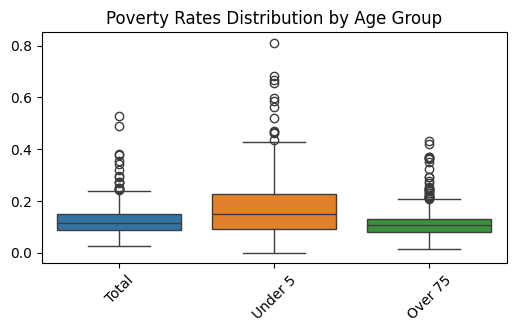

In [15]:
# 🔒This cell is locked. You will not be able to edit it.

# visualize the distribution of the rates
plt.figure(figsize=(6, 3))
sns.boxplot(data=census_df_clean[["total_poverty_rate", "under_5_poverty_rate", 
                     "over_75_poverty_rate"]])
plt.title("Poverty Rates Distribution by Age Group")
plt.xticks(ticks=[0, 1, 2], labels=["Total", "Under 5", "Over 75"], 
           rotation=45)
plt.show()

Poverty rates among children under 5 appear higher than both the total population and over-75 rates. You want to analyze how this variable differs across states.

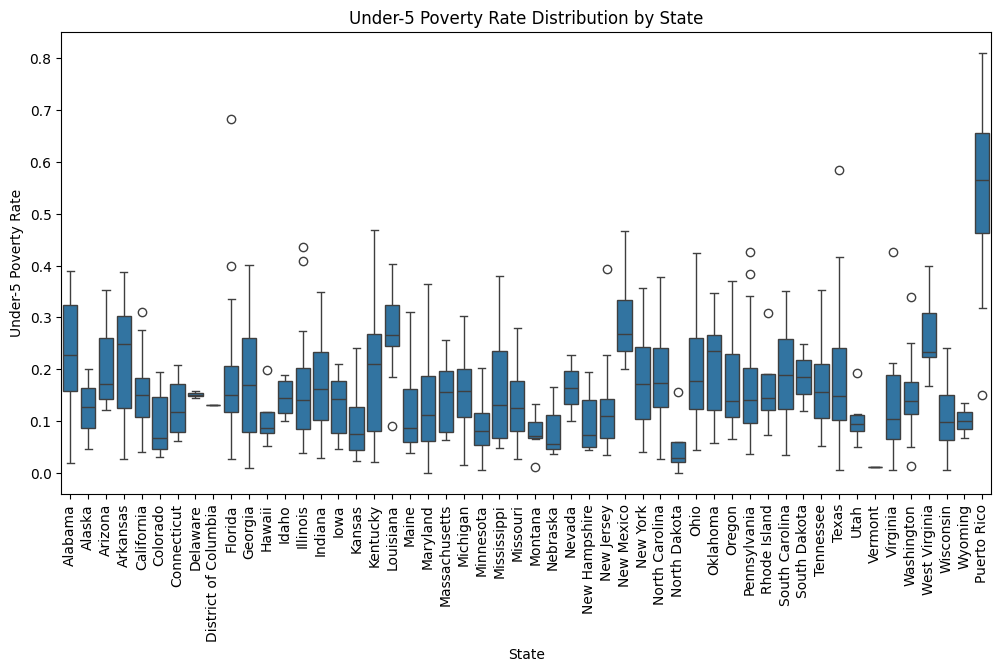

In [16]:
# 🔒This cell is locked. You will not be able to edit it.

# visualize the distribution of the rates by state
plt.figure(figsize=(12, 6))
sns.boxplot(x="state_name", y="under_5_poverty_rate", data=census_df_clean)
plt.title("Under-5 Poverty Rate Distribution by State")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Under-5 Poverty Rate")
plt.show()

What conclusions can you make based on these graphs?

<a id="step-4"></a>

## Step 4: Identifying Most Vulnerable Areas

<a id="defining-a-vulnerability-metric"></a>

### Defining a Vulnerability Metric

To effectively allocate your organization's resources, you need a systematic way to identify the most vulnerable communities.

<a id="ex6"></a>

#### Exercise 6: Multi-Factor Vulnerability Analysis

To understand the communities you're studying, you need to consider how different vulnerabilities interact. By analyzing multiple factors together, you can develop a more comprehensive understanding of each community's specific needs. The employment rate and the proportion of poverty are provided for you in the code.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**

1. Calculate a vulnerability score that considers:
    - The total poverty rate.
    - The proportion of poverty in children under 5.
    - The employment rate.

    Use the following formula: 
    
    $$\begin{align*}
    \text{vulnerability score} =& \text{``total poverty rate"}\cdot 0.35 + \\
    & \text{``under-5 poverty proportion"}\cdot0.40 + \\
    &(1-\text{``employment rate"})\cdot0.25
    \end{align*}$$
2. Use the `normalize` function from `helper_functions` to scale the vulnerability score between 0 and 1. Save the result in a new column called `"vulnerability_score"`.
3. Convert the `"vulnerability_score"` values into percentages by scaling them from 0–1 to 0–100.
    
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To implement the vulnerability score formula, you need to select each of the columns, multiply them by the desired coefficient, and then add the three terms together.
- To scale between 0 and 100, you need to multiply the scaled vulnerability score by 100.
</ul>

</details>


In [17]:
# GRADED CELL: Exercise 6

# import the helper functions
import helper_functions


# get the employment rate
census_df_clean["employment_rate"] = census_df_clean["employed_total"] / census_df_clean["population"]
# get the proportion (from the total population) of children under 5 in poverty
census_df_clean["under_5_poverty_proportion"] = (
                            census_df_clean["poverty_count_female_under_5"] +
                            census_df_clean["poverty_count_male_under_5"]
                            )/ census_df_clean["poverty_count"]

### START CODE HERE ###

# calculate vulnerability score 
vulnerability_score = ( 
    # overall poverty (35% weight)
    census_df_clean["total_poverty_rate"] * 0.35 +
    # child poverty (40% weight)
    census_df_clean["under_5_poverty_proportion"] * 0.40 +
    # unemployment (25% weight). Subtract employment rate from 1 to get the 
    # unemployment rate
    (1 - census_df_clean["employment_rate"]) * 0.25
) 

# normalize the vulnerability score between 0-1
census_df_clean["vulnerability_score"] = helper_functions.normalize(vulnerability_score)

# scale it to 0-100 for easier interpretation and add it to a column
census_df_clean["vulnerability_score"] = census_df_clean["vulnerability_score"] * 100

### END CODE HERE ###

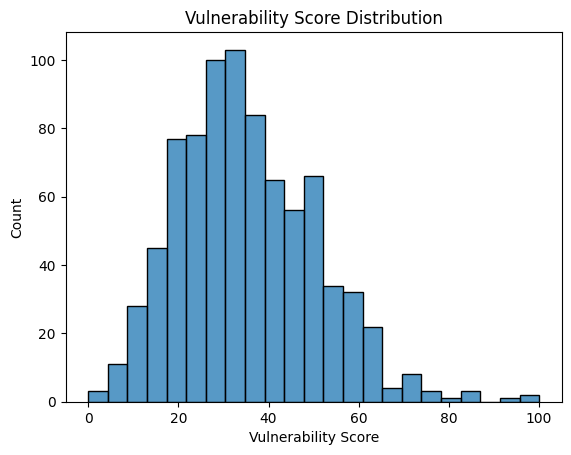

In [18]:
# 🔒This cell is locked. You will not be able to edit it.

# plot the distribution of the vulnerability score
sns.histplot(census_df_clean["vulnerability_score"])
plt.title("Vulnerability Score Distribution")
plt.xlabel("Vulnerability Score")
plt.show()

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/score_hist.png" width="400">
</details>

With this score, you can find the top 5 counties that need the most attention.

In [19]:
# 🔒This cell is locked. You will not be able to edit it.

# find the 5 counties with the highest vulnerability score
census_df_clean.sort_values(by="vulnerability_score", ascending=False
                     )[["county_state","vulnerability_score"]].head()

,county_state,vulnerability_score
848,"Mayagüez Municipio, Puerto Rico",100.0
849,"Ponce Municipio, Puerto Rico",99.992277
449,"McKinley County, New Mexico",94.777404
720,"Hidalgo County, Texas",85.256972
271,"Christian County, Kentucky",83.628375


<a id="ex7"></a>
#### Exercise 7: Categorize Vulnerability Scores

To effectively allocate resources, we need to identify the communities most in need of immediate intervention. You can do this by creating categories according to the vulnerability score you just created.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95% ">  

**▶▶▶ Directions**
1. Split the counties into 5 categories: "Very Low", "Low", "Medium", "High", "Very High". Use a quantile split for this.
2. Save the binned data into a new column called `"priority score"`.

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To create the binning, you can use the function `pd.qcut`. You will need to pass as arguments:
    - The column you want to split into bins
    - `q`: the number of bins
    - `labels`: the labels for each bin
</ul>

</details>


In [20]:
# GRADED CELL: Exercise 7

### START CODE HERE ###

# find the category for each county based on the vulnerability score
priority_score = pd.qcut(census_df_clean["vulnerability_score"], q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# add the priority score to the DataFrame
census_df_clean["priority_score"] = priority_score

### END CODE HERE ###

In [21]:
# 🔒This cell is locked. You will not be able to edit it.

# print the first few rows to check the results
census_df_clean[["county_state", "vulnerability_score", "priority_score"]].head()

,county_state,vulnerability_score,priority_score
0,"Baldwin County, Alabama",31.968542,Medium
1,"Calhoun County, Alabama",58.262534,Very High
2,"Cullman County, Alabama",57.361382,Very High
3,"DeKalb County, Alabama",69.0855,Very High
4,"Elmore County, Alabama",37.669165,High


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex7.png" width="300">
</details>

You can use this information to find the states which have counties with a "Very High" priority score, and show how many counties with this score they have. This is a great strategy to help allocate resources.

In [22]:
# 🔒This cell is locked. You will not be able to edit it.

# find the states with very high vulnerability

# filter the counties with very high vulnerability
very_high_vulnerability = census_df_clean[census_df_clean["priority_score"]=="Very High"][
    ["vulnerability_score", "state_name"]]

# group by state and get the number of counties with very high vulnerability
very_high_vulnerability.groupby(
    "state_name").count().sort_values(by="vulnerability_score", ascending=False)

,vulnerability_score
state_name,
Texas,17
Louisiana,14
Georgia,12
California,11
North Carolina,10
Alabama,10
Puerto Rico,8
Ohio,7
Arkansas,6


<a id="using-outliers"></a>

### Using Outliers to Identify Population at Risk

<a id="ex8"></a>

#### Exercise 8: Handling Outliers in Poverty Rates

Another way to identify communities in urgent need is by looking for counties with unusually high poverty rates that stand out from typical patterns. These statistical outliers often represent areas facing severe challenges that require immediate intervention.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Find the z-score for the `"poverty_count"` column.
2. Set the `z_score_threshold` to 3.
3. Find the outliers on the upper end of the distribution.

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- The formula to find the z-score, is $\frac{x-\text{mean}(x)}{\text{std}(x)}$, with $x$ being the `"poverty_count"` column.
- To find the outliers, you need to filter the DataFrame to keep only the values where the `"z_score"` column is above the threshold.
</ul>

</details>


In [23]:
# GRADED CELL: Exercise 8

### START CODE HERE ###

# Calculate the Z-scores for the "poverty_count" column
census_df_clean["z_score"] = (census_df_clean["poverty_count"] - census_df_clean["poverty_count"].mean()) / census_df_clean["poverty_count"].std()

# Define a threshold for z-scores - see Directions
z_score_threshold = 3

# select rows where the z-score is greater than the threshold.
z_score_outliers = census_df_clean[census_df_clean["z_score"] > z_score_threshold]

### END CODE HERE ###

In [24]:
# 🔒This cell is locked. You will not be able to edit it.

# print the outliers
z_score_outliers[["county_state", "poverty_count", 
                  "total_poverty_rate", "under_5_poverty_rate", 
                  "priority_score", "z_score"]]

,county_state,poverty_count,total_poverty_rate,under_5_poverty_rate,priority_score,z_score
26,"Maricopa County, Arizona",490641,0.10699,0.142602,Medium,5.844146
54,"Los Angeles County, California",1304964,0.135043,0.162972,Medium,16.426081
62,"Orange County, California",280834,0.089559,0.098778,Low,3.117754
64,"Riverside County, California",277276,0.111247,0.147488,Medium,3.071518
67,"San Bernardino County, California",283551,0.129144,0.155785,High,3.153061
68,"San Diego County, California",318653,0.097448,0.107847,Low,3.609203
133,"Miami-Dade County, Florida",371006,0.138081,0.175929,Medium,4.289518
202,"Cook County, Illinois",664755,0.130675,0.171759,Medium,8.106716
362,"Wayne County, Michigan",355646,0.203091,0.27382,Very High,4.089918
416,"Clark County, Nevada",293758,0.125722,0.227651,High,3.285698


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

<img src="imgs/ex8.png" width="700">
</details>

Congratulations on finishing this graded lab! If everything is running correctly, you can go ahead and submit your code for grading.